<a href="https://colab.research.google.com/github/SaMoAAlamdari/Price-Optimizing/blob/main/Price_Optimizing_Retail_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
import io

In [2]:

uploaded = files.upload()


Saving retail_sales_dataset.csv to retail_sales_dataset.csv


In [3]:
pricing_data = pd.read_csv(io.BytesIO(uploaded["retail_sales_dataset.csv"]))
print(pricing_data.head())
#Reading data and see the head of data

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [5]:
pricing_data.info()

#Seeing Data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


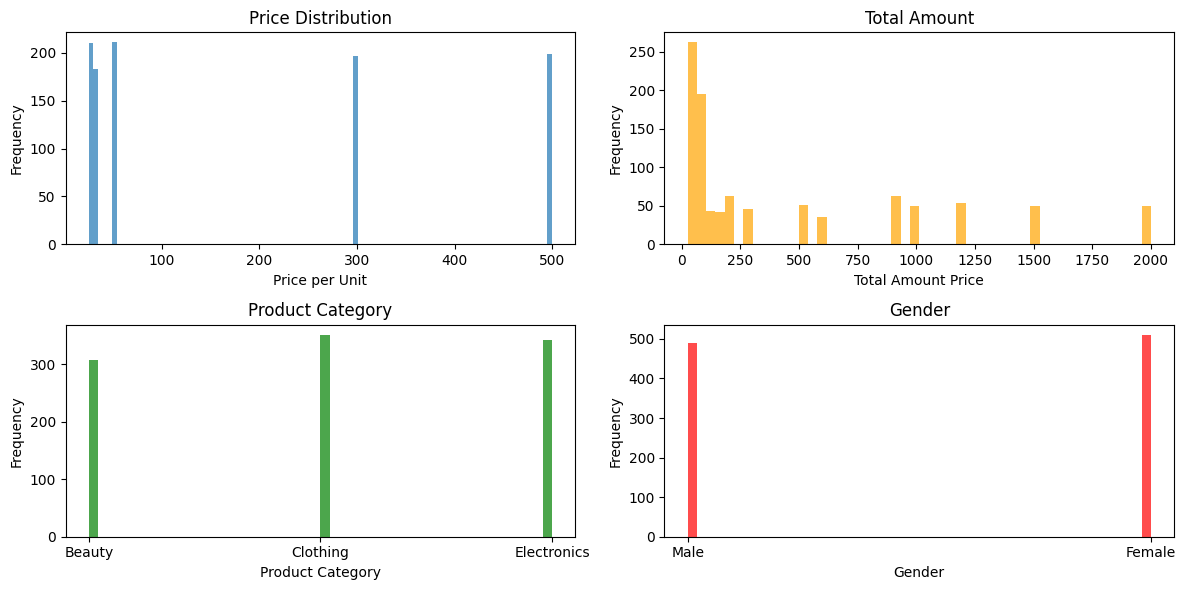

In [6]:
from matplotlib import pyplot as plt

#Plot the frequency of price per unit
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(pricing_data['Price per Unit'], bins=100, alpha=0.7, label='Your Store')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.title('Price Distribution')

#Plot the frequency of Total Amount Price
plt.subplot(2, 2, 2)
plt.hist(pricing_data['Total Amount'], bins=50, alpha=0.7, color='orange', label='Total Amount')
plt.xlabel('Total Amount Price')
plt.ylabel('Frequency')
plt.title('Total Amount')

#Plot the frequency of Product Category
plt.subplot(2, 2, 3)
plt.hist(pricing_data['Product Category'], bins=50, alpha=0.7, color='green', label='Product Category')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Product Category')

#Plot the frequency of Gender
plt.subplot(2, 2, 4)
plt.hist(pricing_data['Gender'], bins=50, alpha=0.7, color='red', label='Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender')

plt.tight_layout()
plt.show()

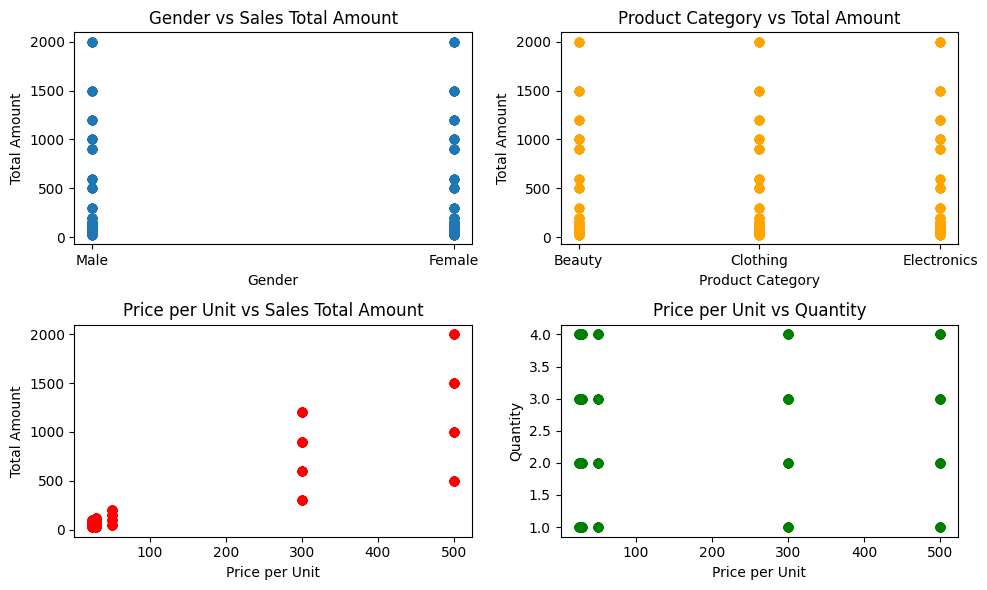

In [7]:
#plot some other columns to understand data better
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.scatter(pricing_data['Gender'], pricing_data['Total Amount'], alpha=0.6)
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.title('Gender vs Sales Total Amount')

plt.subplot(2, 2, 2)
plt.scatter(pricing_data['Product Category'], pricing_data['Total Amount'], alpha=0.6, color='orange')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.title('Product Category vs Total Amount')


plt.subplot(2, 2, 3)
plt.scatter(pricing_data['Price per Unit'], pricing_data['Total Amount'], alpha=0.6, color='red')
plt.xlabel('Price per Unit')
plt.ylabel('Total Amount')
plt.title('Price per Unit vs Sales Total Amount')

plt.subplot(2, 2, 4)
plt.scatter(pricing_data['Price per Unit'], pricing_data['Quantity'], alpha=0.6, color='green')
plt.xlabel('Price per Unit')
plt.ylabel('Quantity')
plt.title('Price per Unit vs Quantity')


plt.tight_layout()
plt.show()

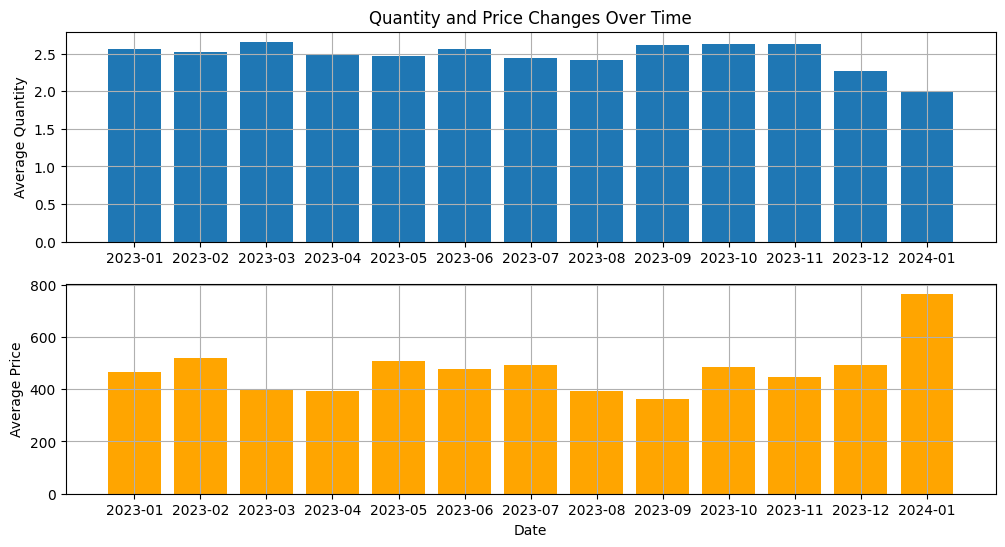

In [8]:

pricing_data['Date'] = pd.to_datetime(pricing_data['Date'] , format='%Y-%m-%d')

weekly_prices = pricing_data.groupby(pricing_data['Date'].dt.strftime('%Y-%m')).agg({
    'Quantity': 'mean',
    'Total Amount': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.bar(weekly_prices['Date'], weekly_prices['Quantity'], label='Quantity')
plt.ylabel('Average Quantity')
plt.title('Quantity and Price Changes Over Time')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.bar(weekly_prices['Date'], weekly_prices['Total Amount'], label='Total Amount', color='orange')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)

plt.show()

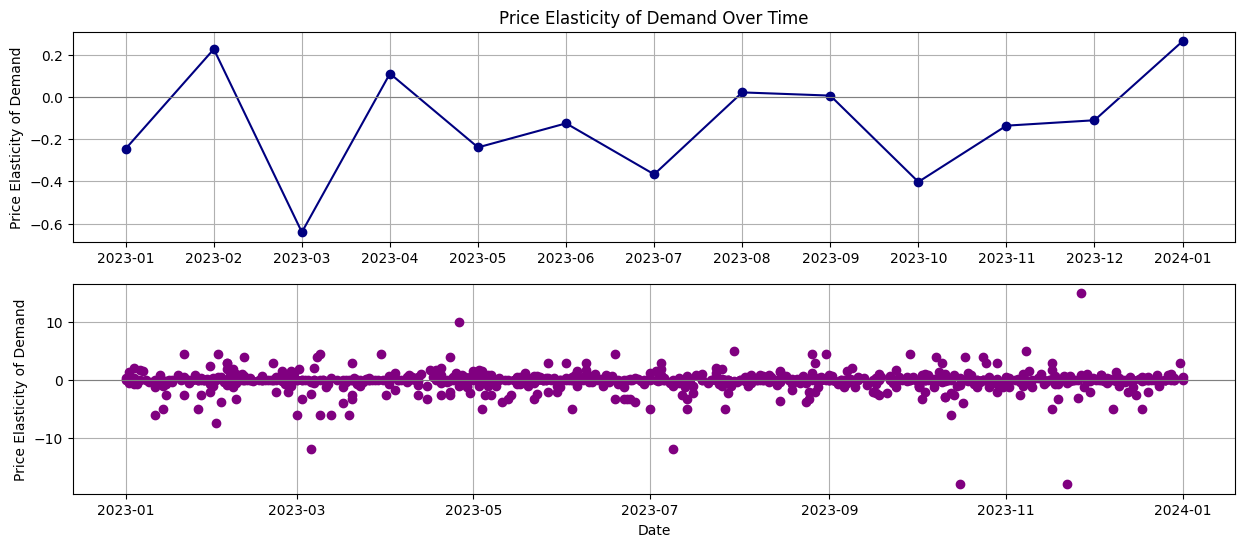

In [9]:
#Calculate the elasticity and plot it
pricing_data['price_change'] = pricing_data['Price per Unit'].pct_change()
pricing_data['qty_change'] = pricing_data['Quantity'].pct_change()

pricing_data['elasticity'] = pricing_data['qty_change'] / pricing_data['price_change']

pricing_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
pricing_data.dropna(subset=['elasticity'], inplace=True)

weekly_elasticity = pricing_data.groupby(pricing_data['Date'].dt.strftime('%Y-%m')).agg({
    'elasticity': 'mean'
}).reset_index()

plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.plot(weekly_elasticity['Date'], weekly_elasticity['elasticity'], marker='o', linestyle='-', color='navy')
plt.axhline(0, color='grey', linewidth=0.8)
plt.ylabel('Price Elasticity of Demand')
plt.title('Price Elasticity of Demand Over Time')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(pricing_data['Date'], pricing_data['elasticity'], marker='o', linestyle=' ', color='purple')
plt.axhline(0, color='grey', linewidth=0.8)
plt.xlabel('Date')
plt.ylabel('Price Elasticity of Demand')
plt.grid(True)

plt.show()

In [10]:
# define price brackets
bins = [ 0 ,29  , 49 , 200, 400, 600]
labels = ['0-29','29-49','49-200' ,'200-400', '400-600']

# create price brackets for your store
pricing_data['price_bracket'] = pd.cut(pricing_data['Price per Unit'], bins=bins, labels=labels, right=False)


# calculate sales amount by price bracket for your store

sales_by_bracket= pricing_data.groupby('price_bracket', observed=False)['Total Amount'].sum().reset_index()

sales_by_bracket.columns = ['Price Bracket', ' Sales Amount']

# calculate Quantity by price bracket for your store
Quantity_by_bracket= pricing_data.groupby('price_bracket', observed=False)['Quantity'].sum().reset_index()

Quantity_by_bracket.columns = ['Price Bracket', 'Quantity']


your_store=pd.merge( sales_by_bracket, Quantity_by_bracket, on='Price Bracket')
your_store


,Price Bracket,Sales Amount,Quantity
0,0-29,9650,386
1,29-49,11580,386
2,49-200,20850,417
3,200-400,125100,417
4,400-600,206000,412


In [11]:
item_summary = pricing_data.groupby('price_bracket', observed=False).agg({
    'Price per Unit' : 'mean',
    'Quantity': 'sum'
}).reset_index()

# merge the item summary back to the main dataset
pricing_data = pd.merge(pricing_data, item_summary, on='price_bracket', suffixes=('', '_avg'))

# define segments based on price
pricing_data['segment'] = pd.cut(pricing_data['Price per Unit_avg'], bins = [0 , 29, 49, 200, 400, 600], labels=['Low_25','Low_30', 'Low_50','Medium_300', 'High_500'])


In [12]:
# calculate price elasticity for each segment
segments = pricing_data['segment'].unique()
elasticity_data = []

for segment in segments:
    segment_data = pricing_data[pricing_data['segment'] == segment]
    segment_data['qty_change'] = segment_data['Quantity'].pct_change()
    segment_data['elasticity'] = segment_data['qty_change'] / segment_data['price_change']

    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    segment_data.dropna(subset=['elasticity'], inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)

elasticity_df

,segment,avg_elasticity
0,High_500,0.123363
1,Low_30,-0.174159
2,Low_50,0.042899
3,Low_25,-0.498116
4,Medium_300,-0.150952


Low_30=-0.174159 and Low_25=-0.498116 and Medium_300 =-0.150952  that means quantity demands is relatively inelastic to price changes that means small changes in price will not significantly affect demand and we increasing price to maximaize revenue without losing much in sales volume
High_500=0.123363 and Low_50=0.042899 this indicate that the quantity demanded is more elastic to price changes this means demadnd is sensitive to price changes

In [13]:
# create a copy of the dataset for simulation
dynamic_pricing_data = pricing_data.copy()

# apply dynamic pricing rules
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Low_25' ,'dynamic_price'] = dynamic_pricing_data['Price per Unit'] * 1.05
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Low_30' ,'dynamic_price'] = dynamic_pricing_data['Price per Unit'] * 1.05
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Low_50' ,'dynamic_price'] = dynamic_pricing_data['Price per Unit'] * 0.95

dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Medium_300', 'dynamic_price'] = dynamic_pricing_data['Price per Unit'] *1.1
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'High_500', 'dynamic_price'] = dynamic_pricing_data['Price per Unit'] *0.95

# calculate new sales amounts based on dynamic prices
dynamic_pricing_data['dynamic_sales_amt'] = dynamic_pricing_data['dynamic_price'] * dynamic_pricing_data['Quantity']

# compare total sales amount between existing and dynamic pricing
total_sales_existing = pricing_data['Total Amount'].sum()
total_sales_dynamic = dynamic_pricing_data['dynamic_sales_amt'].sum()

# compare total quantity sold between existing and dynamic pricing
total_qty_existing = pricing_data['Quantity'].sum()
total_qty_dynamic = dynamic_pricing_data['Quantity'].sum()  # quantity sold remains the same for comparison

comparison_summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Existing Pricing': [total_sales_existing, total_qty_existing],
    'Dynamic Pricing': [total_sales_dynamic, total_qty_dynamic]
})

comparison_summary

,Metric,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,373180,375409.0
1,Total Quantity Sold,2018,2018.0


In [14]:
pricing_data['dynamic_price'] = dynamic_pricing_data['dynamic_price']